In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [10]:
df=pd.read_csv('train.csv')

In [11]:
df.drop(['Levy',''])

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1435 non-null   float64
 1   KM        1435 non-null   int64  
 2   Weight    1435 non-null   float64
 3   HP        1435 non-null   int64  
 4   MetColor  1435 non-null   int64  
 5   CC        1435 non-null   float64
 6   Doors     1435 non-null   int64  
 7   Price     1435 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 100.9 KB


In [7]:
df.describe()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,56.027178,68571.782578,1071.659930,101.491986,0.674564,1566.735192,4.032753,10720.915679
std,18.532943,37491.094553,47.688509,14.981408,0.468701,186.767122,0.952667,3608.732978
min,1.000000,1.000000,1000.000000,69.000000,0.000000,1300.000000,2.000000,4350.000000
25%,44.000000,43000.000000,1040.000000,90.000000,0.000000,1400.000000,3.000000,8450.000000
50%,61.000000,63451.000000,1070.000000,110.000000,1.000000,1600.000000,4.000000,9900.000000
75%,70.000000,87041.500000,1085.000000,110.000000,1.000000,1600.000000,5.000000,11950.000000
max,80.000000,243000.000000,1320.000000,192.000000,1.000000,2000.000000,5.000000,32500.000000


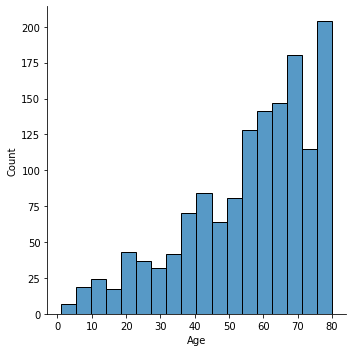

In [8]:
#Plot out age of a car
sns.displot(df['Age'])